주제 : 워싱턴D.C소재의 자전거 대여 회사의 데이터를 이용, 특정 시간대 얼마나 많은 사람들이 자전거를 대여하는지 예측

Columns
1. datetime - 시간 연-월-일 시:분:초 (ex> 2022-10-23 12:00:00은 2022년 10월 1일 0시 0분 0초)
2. season - 계절 : 봄(1), 여름(2), 가을(3), 겨울(4)
3. holiday - 공휴일의 여부 : 공휴일(1), 공휴일아님(0)
4. workingday - 근무일 여부 : 근무일(1), 근무일아님(0)
5. weather - 날씨 1~4로 이루어짐
    (1) : 맑음 혹은 구름약간낌
    (2) : 약간의 안개와 구름
    (3) : 약간의 눈, 비 혹은 천둥
    (4) : 아주 많은비 혹은 우박
6. temp - 온도
7. atemp - 체감온도
8. humidty - 습도
9. casual - 비회원 자전거 대여량
10. registered - 등록된 회원 자전거 대여량
11. count - 총 자전거 대여량 (비회원+회원의 대여량의 합 = target값)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os


In [5]:
#데이터셋 로딩
train = pd.read_csv(os.path.join('./bike_data/train.csv'))
test = pd.read_csv(os.path.join('./bike_data/test.csv' ))

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
#총 데이터 갯수, 컬럼의 갯수
train.shape, test.shape

((10886, 12), (6493, 9))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [11]:
#결측치 갯수 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [14]:
#datetime 64셋으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

In [15]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek
train['quarter'] = train['datetime'].dt.quarter
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second



In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  dayofweek   10886 non-null  int64         
 16  quarter     10886 non-

In [17]:
train[['year', 'month','day', 'dayofweek', 'quarter', 'hour', 'minute', 'second']].head()

,year,month,day,dayofweek,quarter,hour,minute,second
0,2011,1,1,5,1,0,0,0
1,2011,1,1,5,1,1,0,0
2,2011,1,1,5,1,2,0,0
3,2011,1,1,5,1,3,0,0
4,2011,1,1,5,1,4,0,0


In [19]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [20]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['dayofweek'] = test['datetime'].dt.dayofweek
test['quarter'] = test['datetime'].dt.quarter
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

In [21]:
test[['year', 'month','day', 'dayofweek', 'quarter', 'hour', 'minute', 'second']].head()

,year,month,day,dayofweek,quarter,hour,minute,second
0,2011,1,20,3,1,0,0,0
1,2011,1,20,3,1,1,0,0
2,2011,1,20,3,1,2,0,0
3,2011,1,20,3,1,3,0,0
4,2011,1,20,3,1,4,0,0


In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,1,4,0,0


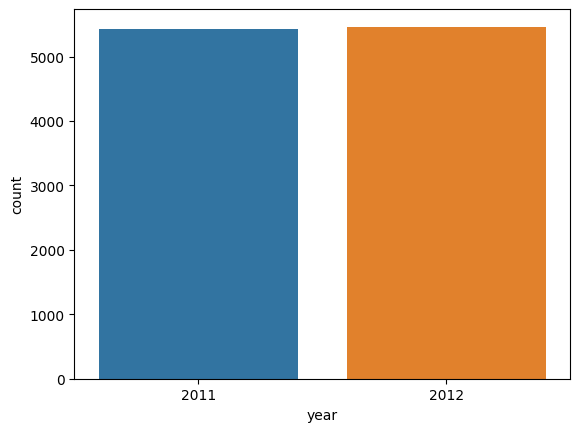

In [24]:
#연도별 데이터셋 갯수 시각화(countplot)
sns.countplot(x='year', data=train)
plt.show()

In [25]:
#월별(month) 평균온도(temp)
pd.DataFrame(train.groupby('month')['temp'].mean())

,temp
month,
1,9.840000
2,11.798535
3,15.902175
4,18.718372
5,22.674079
6,27.064496
7,30.841711
8,29.736689
9,25.779032


<AxesSubplot: xlabel='month'>

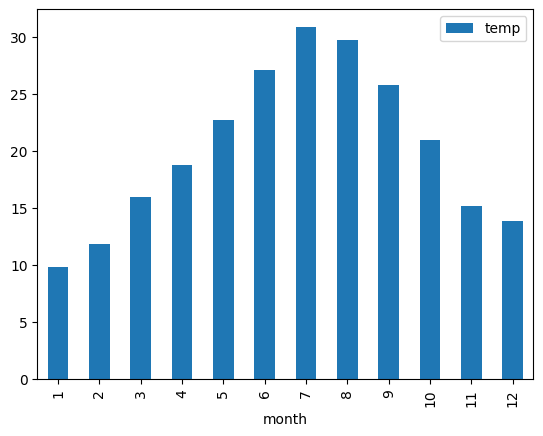

In [26]:
#월별(month) 평균온도(temp) 시각화(bar-dataframe)(kind='bar')
pd.DataFrame(train.groupby('month')['temp'].mean()).plot(kind='bar')
plt.show()